In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import viz

%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.6)

In [2]:
month_lu = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

df = pd.read_csv('data/customers.csv', sep=';')
df['row_id'] = df.reset_index().index
df['month_num'] = df.month.map(month_lu)
df.month_num = pd.to_numeric(df.month_num, downcast='integer')
df.day = pd.to_numeric(df.day, downcast='integer')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,row_id,month_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int8  
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  row_id     45211 non-null  int64 
 18  month_num  45211 non-null  int8  
dtypes: int64(7), int8(2), object(10)
memory usage: 6.0+ MB


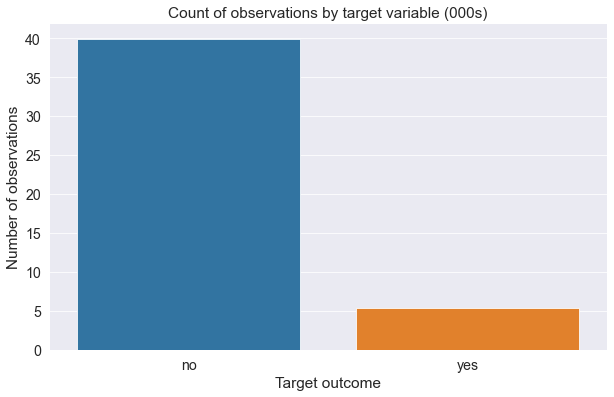

In [26]:
x, y = 'y', 'row_id'

df_target = df[[x, y]].groupby(x, as_index=False).count()
df_target.row_id = df_target.row_id / 1000
plt.figure(figsize=(10, 6))
plt.title('Count of observations by target variable (000s)')
sns.barplot(x=x, y=y, data=df_target).set(xlabel='Target outcome', ylabel='Number of observations');

We do have a slight imbalance ratio of 1:8 in the data. This is not an extreme cause for concern but we could consider balancing the data and seeing if it improves our model.

Due to not having millions of rows to work with we could consider <b>random over-sampling</b> however we will need to be mindful that this could cause overfitting on the test data.

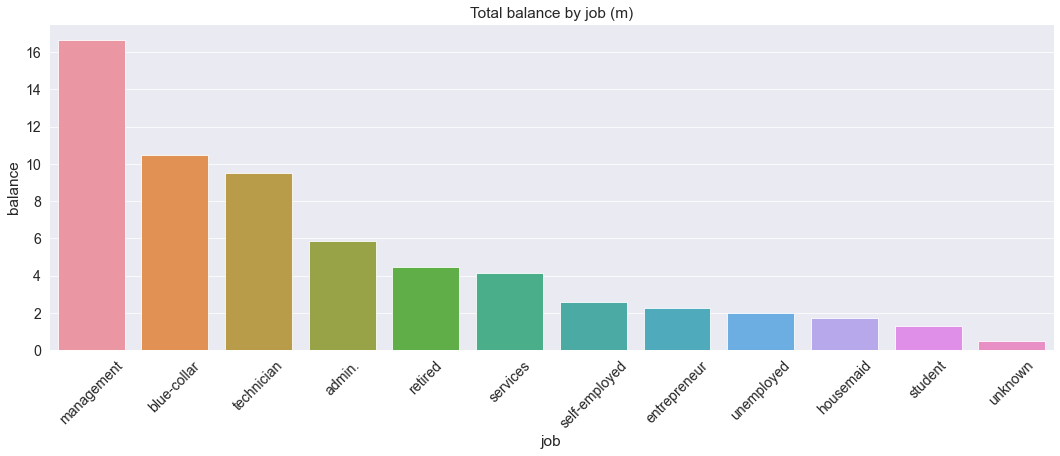

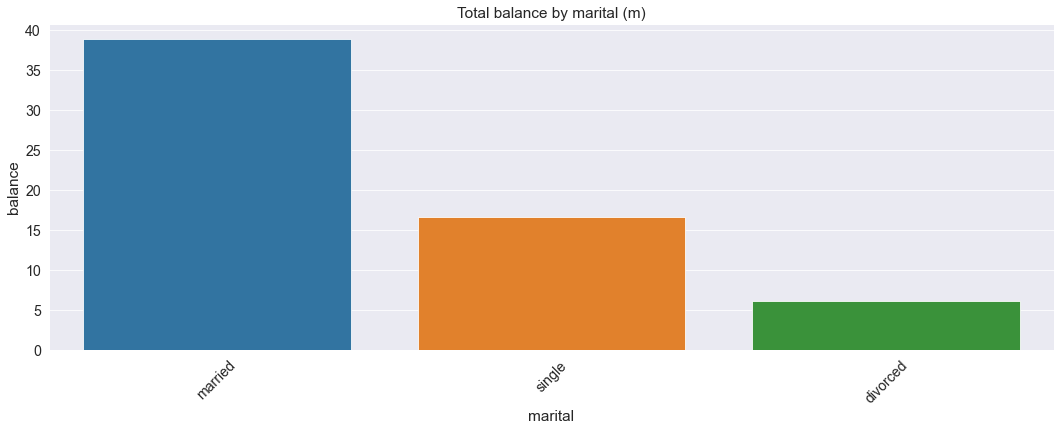

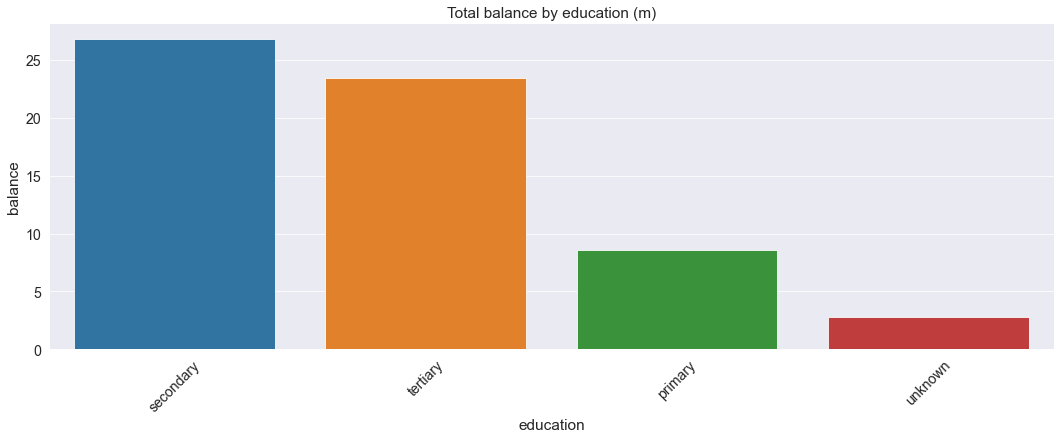

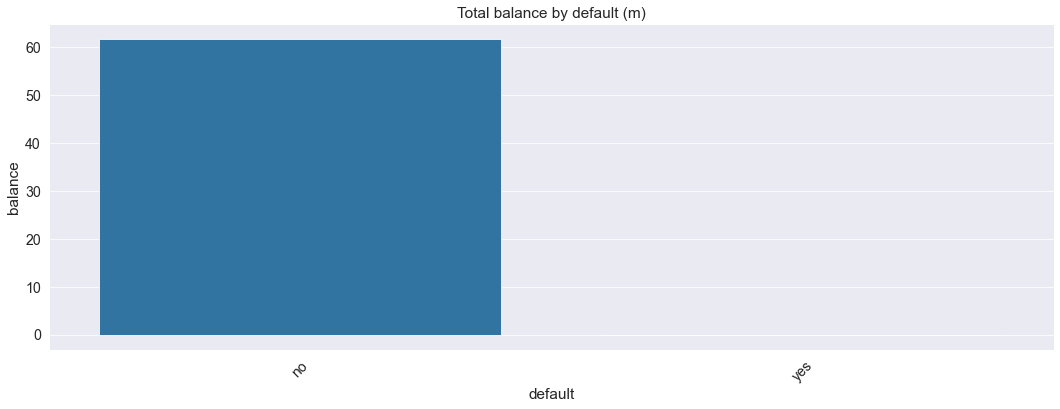

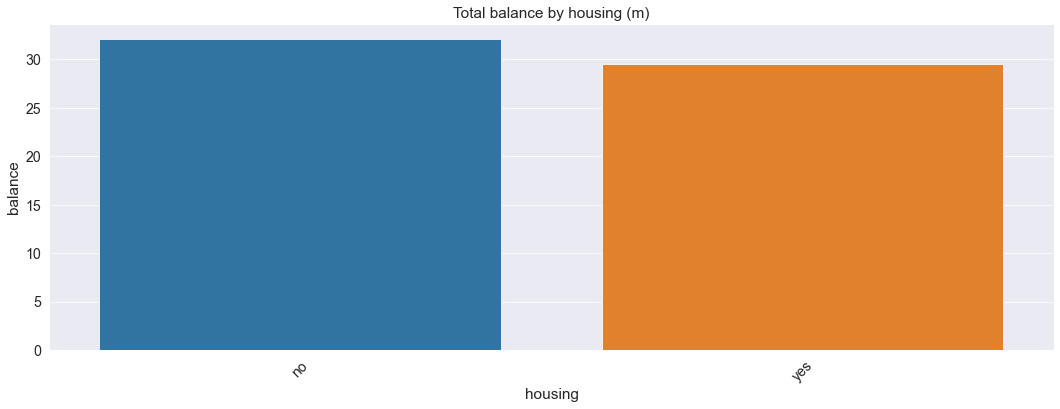

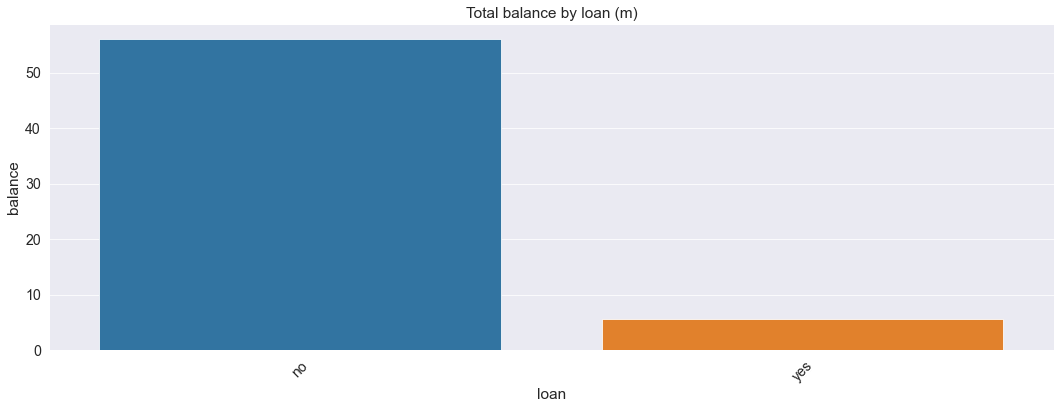

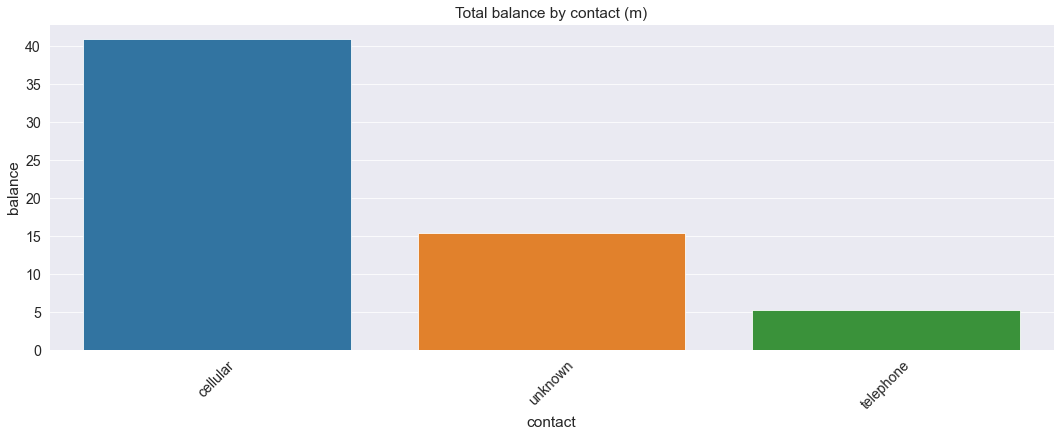

In [4]:
dim_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

for dim in dim_list:
    viz.bar_sum(dim, 'balance');

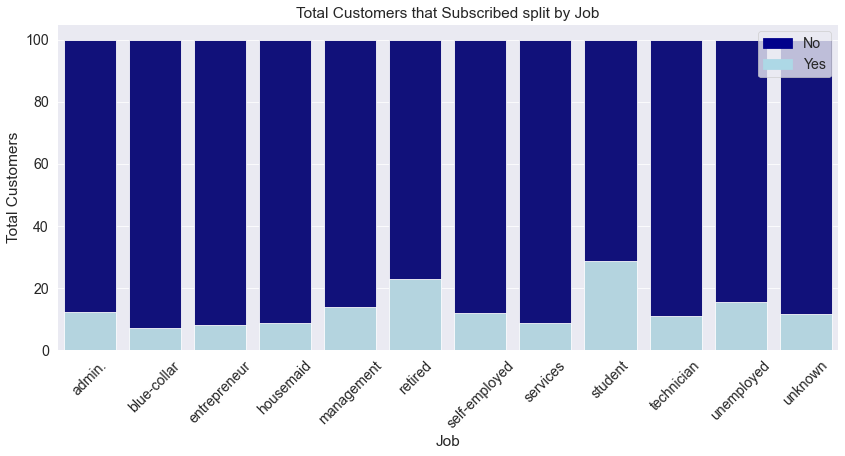

In [91]:
plt.figure(figsize=(14, 6))

total = df.groupby('job')['row_id'].count().reset_index()
part = df[df.y=='yes'].groupby('job')['row_id'].count().reset_index()

part.row_id = [i / j * 100 for i, j in zip(part.row_id, total.row_id)]
total.row_id = [i / j * 100 for i, j in zip(total.row_id, total.row_id)]

bar_total = sns.barplot(x='job',  y='row_id', data=total, color='darkblue')
bar_part = sns.barplot(x='job', y='row_id', data=part, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='No')
bottom_bar = mpatches.Patch(color='lightblue', label='Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Total Customers')
plt.title('Total Customers that Subscribed split by Job')

plt.show()

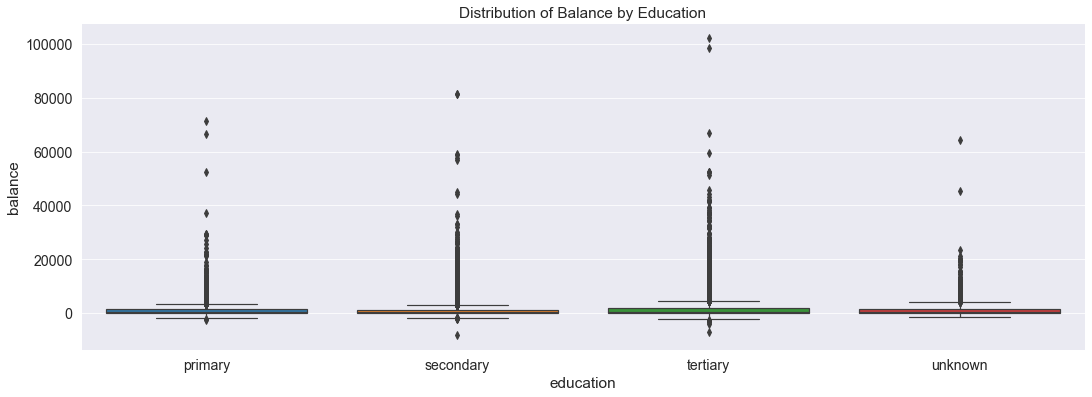

In [5]:
plt.figure(figsize=(18, 6))
plt.title('Distribution of Balance by Education')
sns.boxplot(x='education', y='balance', data=df, order=['primary', 'secondary', 'tertiary', 'unknown']);

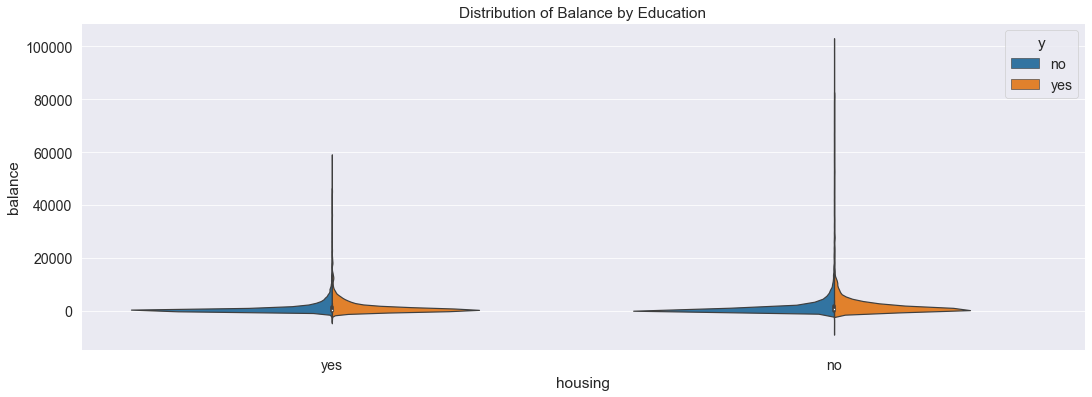

In [6]:
plt.figure(figsize=(18, 6))
plt.title('Distribution of Balance by Education')
sns.violinplot(x='housing', y='balance', data=df, hue='y', split=True);

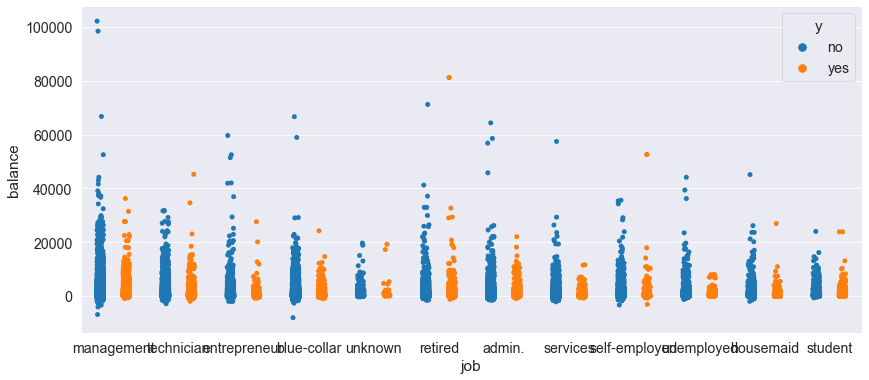

In [7]:
plt.figure(figsize=(14, 6))
sns.stripplot(x='job', y='balance', data=df, jitter=True, hue='y', dodge=True);

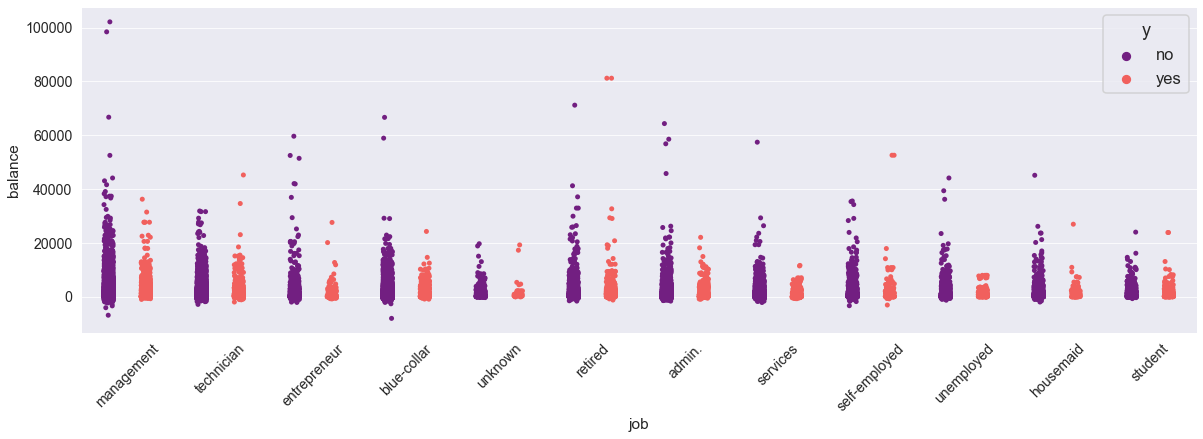

In [8]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='job', y='balance', data=df, jitter=True, hue='y', dodge=True, palette='magma');

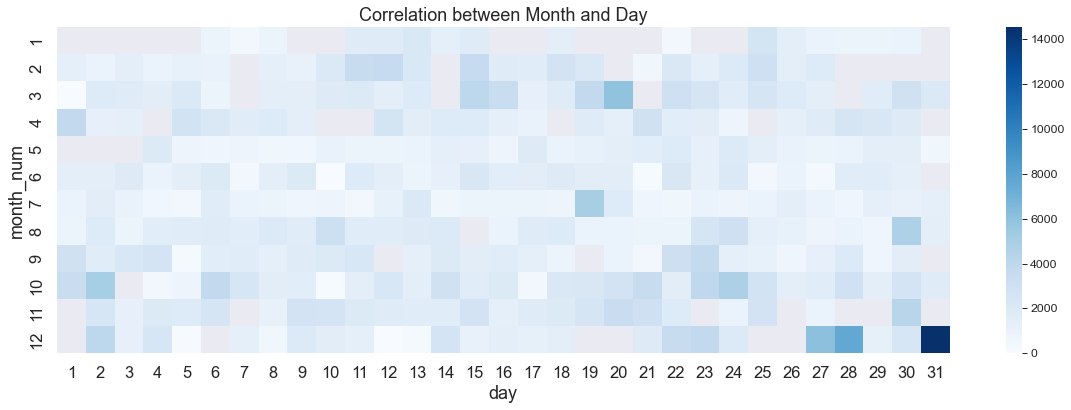

In [9]:
df_pivot = df[['month_num', 'day', 'balance']].sort_values(by=['month_num', 'day'], ascending=True)
df_pivot = df_pivot.pivot_table(index='month_num', columns='day', values='balance').round()

plt.figure(figsize=(20, 6))
plt.title('Correlation between Month and Day')
sns.set_context('paper', font_scale=1.4)
sns.heatmap(df_pivot, cmap='Blues');

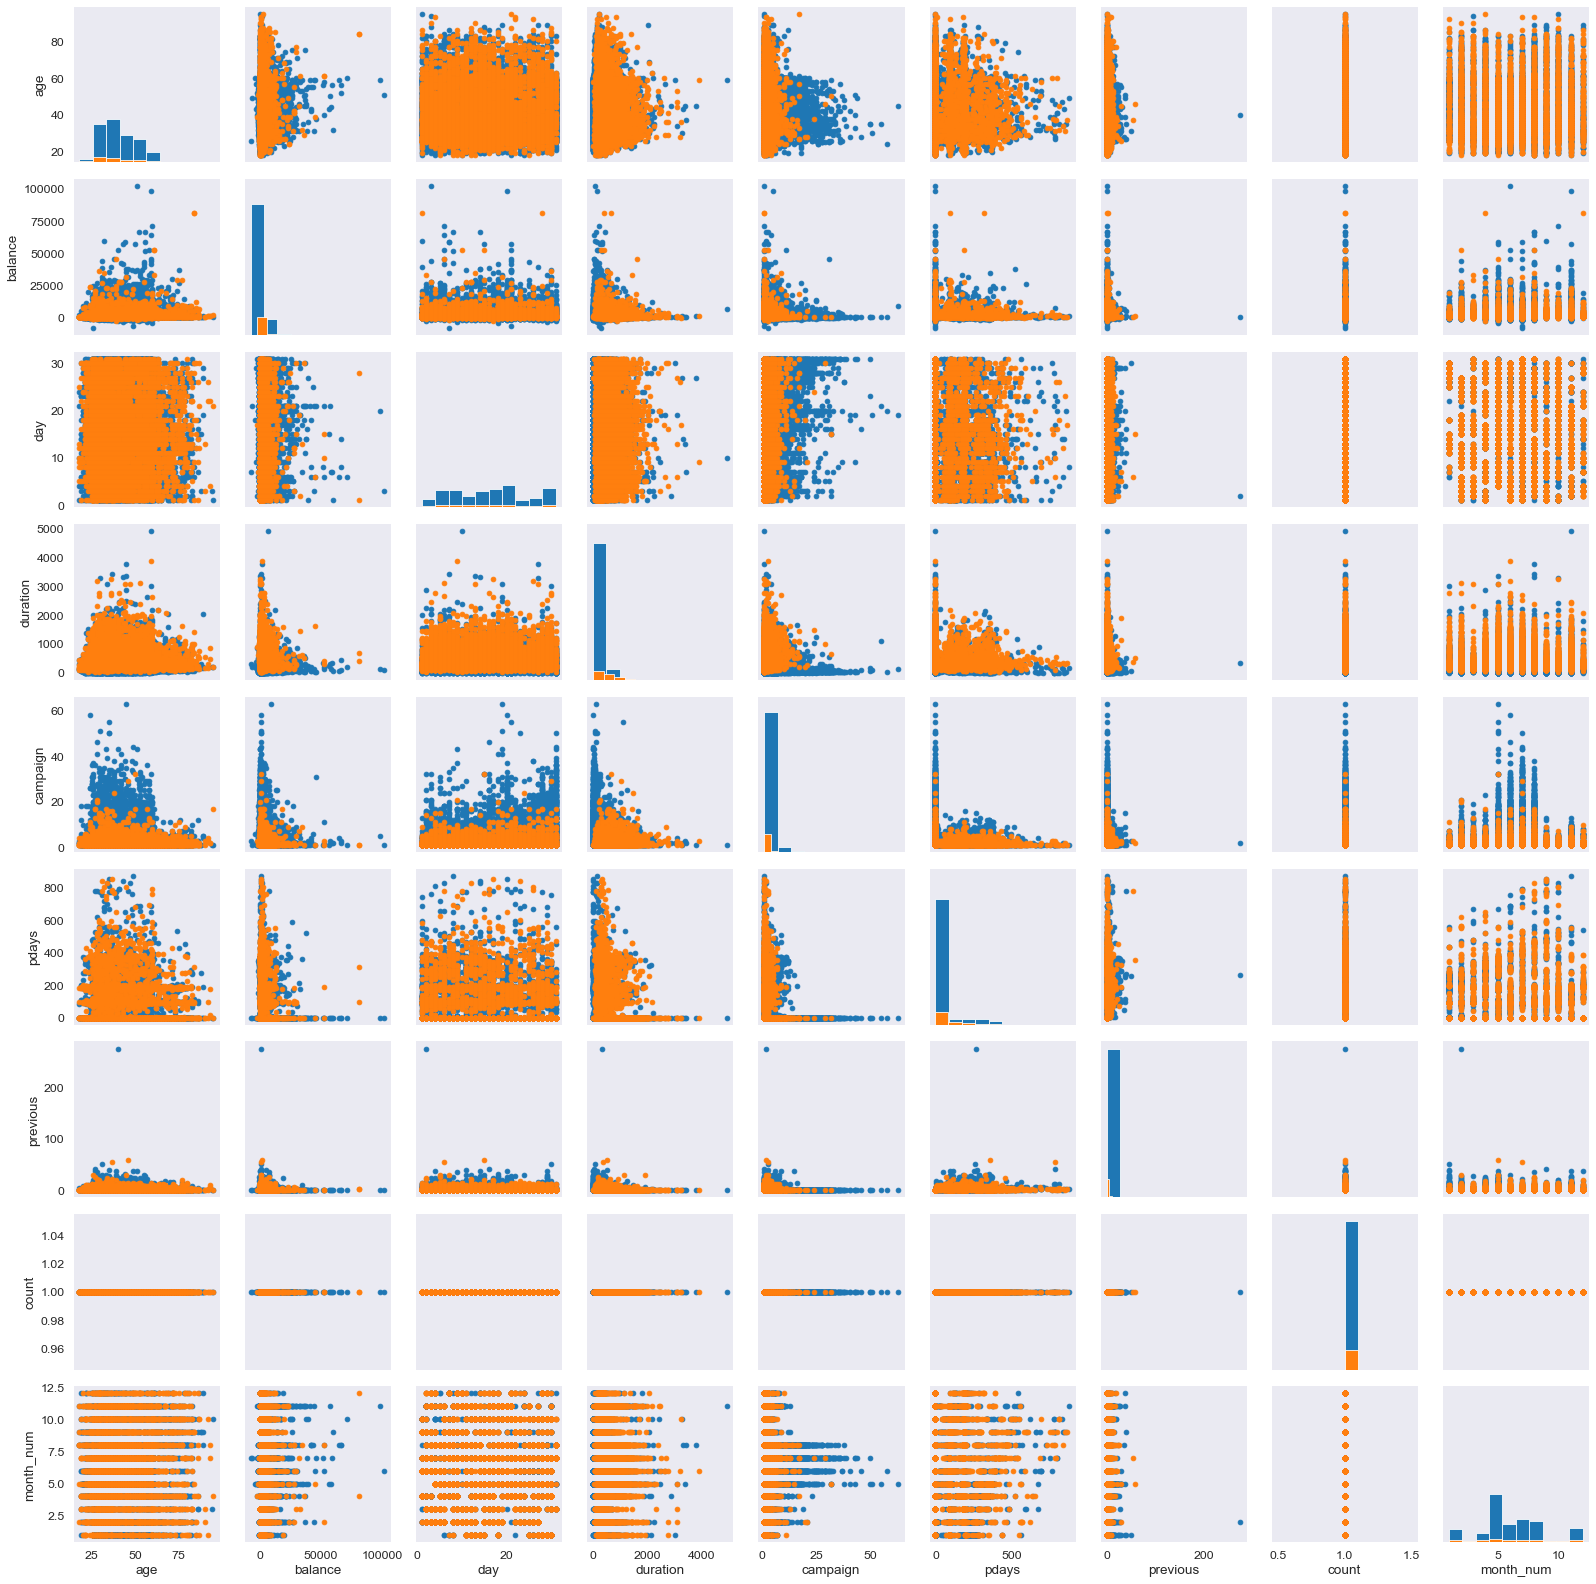

In [10]:
sns.PairGrid(df, hue='y').map_diag(plt.hist).map_offdiag(plt.scatter);

In [ ]:
sns.PairGrid(df, hue='y').map_diag(plt.hist).map_upper(plt.scatter).map_lower(sns.kdeplot)

KeyboardInterrupt: 

In [ ]:
df_fg = sns.FacetGrid(df, col='education', row='y')
df_fg.map(plt.hist, 'age', bins=8);

In [ ]:
df_fg = sns.FacetGrid(df, col='education', hue='y', height=4, aspect=1.3, col_order=['primary', 'secondary', 'tertiary'], palette='Set1')
df_fg.map(plt.scatter, 'age', 'day');

In [ ]:
kws = dict(s=50, linewidth=0.5, edgecolor='w')
df_fg = sns.FacetGrid(df, col='loan', hue='y', height=4, aspect=1.3, hue_order=['yes', 'no'], hue_kws=dict(marker=['^', 'v']))
df_fg.map(plt.scatter, 'age', 'day', **kws);

In [ ]:
plt.figure(figsize=(20, 6))
sns.lmplot(x='age', y='day', hue='y', data=df, markers=['o', '^'], scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});